In [59]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#reading the source file into a dataframe
stores = pd.read_csv("Stores.csv")

In [3]:
#printing the head of the file
stores.head(5)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
#Checking for null values in the data
stores.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [34]:
#Number of unique store areas
len(stores["Store_Area"].unique())

583

In [40]:
#Store with the top sales
stores[stores["Store_Sales"] == stores["Store_Sales"].max()]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320


In [41]:
#Store with the most clients per day
stores[stores["Daily_Customer_Count"] == stores["Daily_Customer_Count"].max()]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
848,849,919,1099,1560,73810


Analyzing the difference between the store 849 and store 650, store 650 has more daily customers than 849, but store 849 makes 57% more in store sales, also store 849 has less products variety in contrast with store 650, a hypothesis could be that store 849 has cheaper products than store 650 thus more customers and less sales.

In [46]:
stores.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

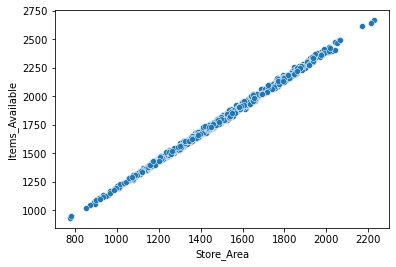

In [49]:
sns.scatterplot(data = stores, x = "Store_Area", y = "Items_Available")

<AxesSubplot:xlabel='Store_Sales', ylabel='Items_Available'>

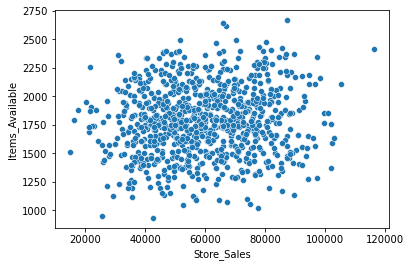

In [48]:
sns.scatterplot(data = stores, x = "Store_Sales", y = "Items_Available")

<AxesSubplot:xlabel='Store_Sales', ylabel='Daily_Customer_Count'>

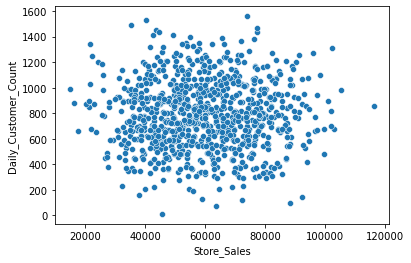

In [44]:
sns.scatterplot(data = stores, x = "Store_Sales", y = "Daily_Customer_Count")

<AxesSubplot:xlabel='Store_Area', ylabel='Count'>

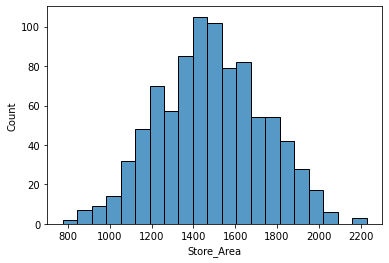

In [54]:
sns.histplot(data = stores, x = "Store_Area")

<AxesSubplot:xlabel='Items_Available', ylabel='Count'>

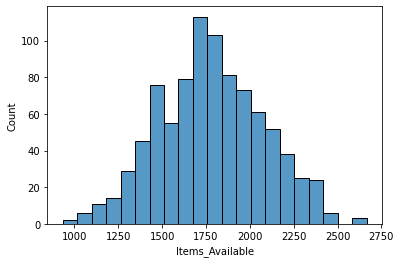

In [55]:
sns.histplot(data = stores, x = "Items_Available")

<AxesSubplot:xlabel='Store_Area'>

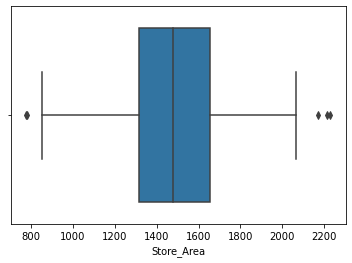

In [58]:
sns.boxplot(data = stores, x = "Store_Area")

In [61]:
X = stores.drop(["Items_Available","Store_Sales"], axis = 1)
y = stores["Store_Sales"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [63]:
model = LinearRegression().fit(X_train, y_train)

In [64]:
y_predict = model.predict(X_test)

In [67]:
100 - model.score(X_test,y_test)

99.9983333872362

In [72]:
pd.DataFrame({"y_predict":y_predict, "y_true":y_test}).head(10)

,y_predict,y_true
544,57767.843501,58390
693,60852.154611,83220
194,58943.488372,52460
218,57491.601195,68430
281,60035.227471,39460
228,56522.492127,73860
764,57956.866134,67390
861,64717.949523,40670
618,59980.083899,68350
652,62601.870992,36530


In [73]:
stores.iloc[544]

Store ID                  545
Store_Area               1270
Items_Available          1519
Daily_Customer_Count      920
Store_Sales             58390
Name: 544, dtype: int64